In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
import seaborn as sns

In [36]:
warnings.filterwarnings('ignore')

# Task -1 :  Import the "City_Air_Quality.csv" dataset. 

In [60]:
df = pd.read_csv("city_day.csv")

# Task -2: Explore the dataset to understand its structure and content.

In [38]:
df.head()

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [39]:
df.tail()

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01-07-2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM25        24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [41]:
df.describe()

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [61]:

# Check for missing values
print(df.isnull().sum())

# Check the column names
print(df.columns)


City              0
Date              0
PM25           4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
Index(['City', 'Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [63]:
# Convert the 'Date' column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# If there are any invalid date formats, use the 'errors' parameter to handle them
# Example: df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')



# Task 3: Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.

In [43]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['SO2', 'NO2', 'PM25', 'PM10', 'CO']

In [44]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[VALUE_COLS] = imputer.fit_transform(df[VALUE_COLS])

In [45]:
# checking to see if the dataset has any null values left over and the format
print(df.isnull().sum())

City              0
Date              0
PM25              0
PM10              0
NO             3582
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [46]:
if 'type' in df.columns:
    df.fillna({
        'agency': 'Unknown',
        'location': 'Unknown',
        'type': df['type'].mode()[0]  # filling with mode
    }, inplace=True)
else:
    print("Column 'type' is missing from the DataFrame.")

Column 'type' is missing from the DataFrame.


In [47]:
df.isnull().sum()

City              0
Date              0
PM25              0
PM10              0
NO             3582
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
# Drop rows with any NaN values in place
df.isnull().sum()

City          0
Date          0
PM25          0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

# Task- 4: Create line plots or time series plots to visualize the overall AQI trend over time.

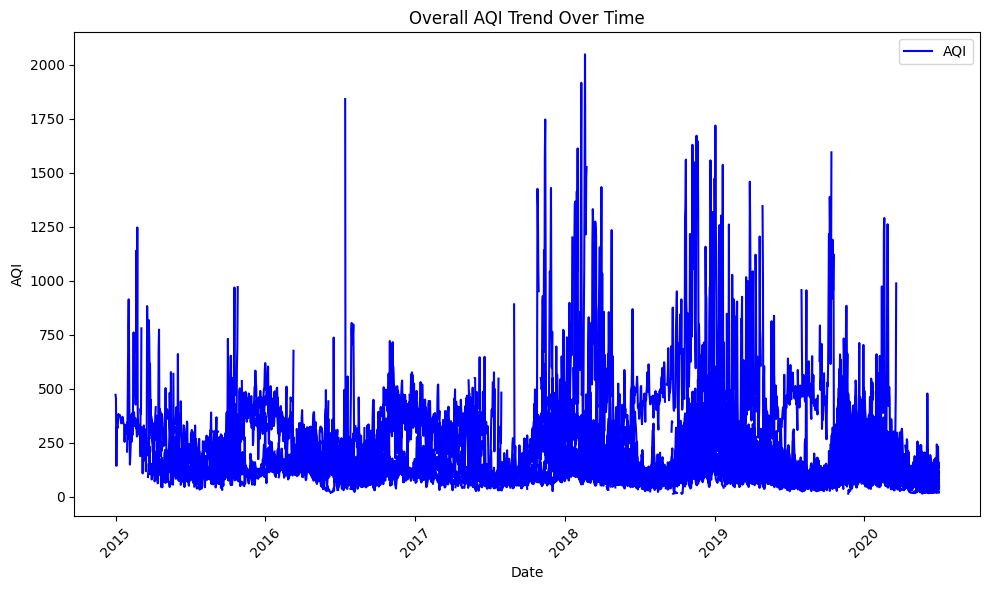

In [64]:
import matplotlib.pyplot as plt

# Plot AQI trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AQI'], label='AQI', color='blue')
plt.title('Overall AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


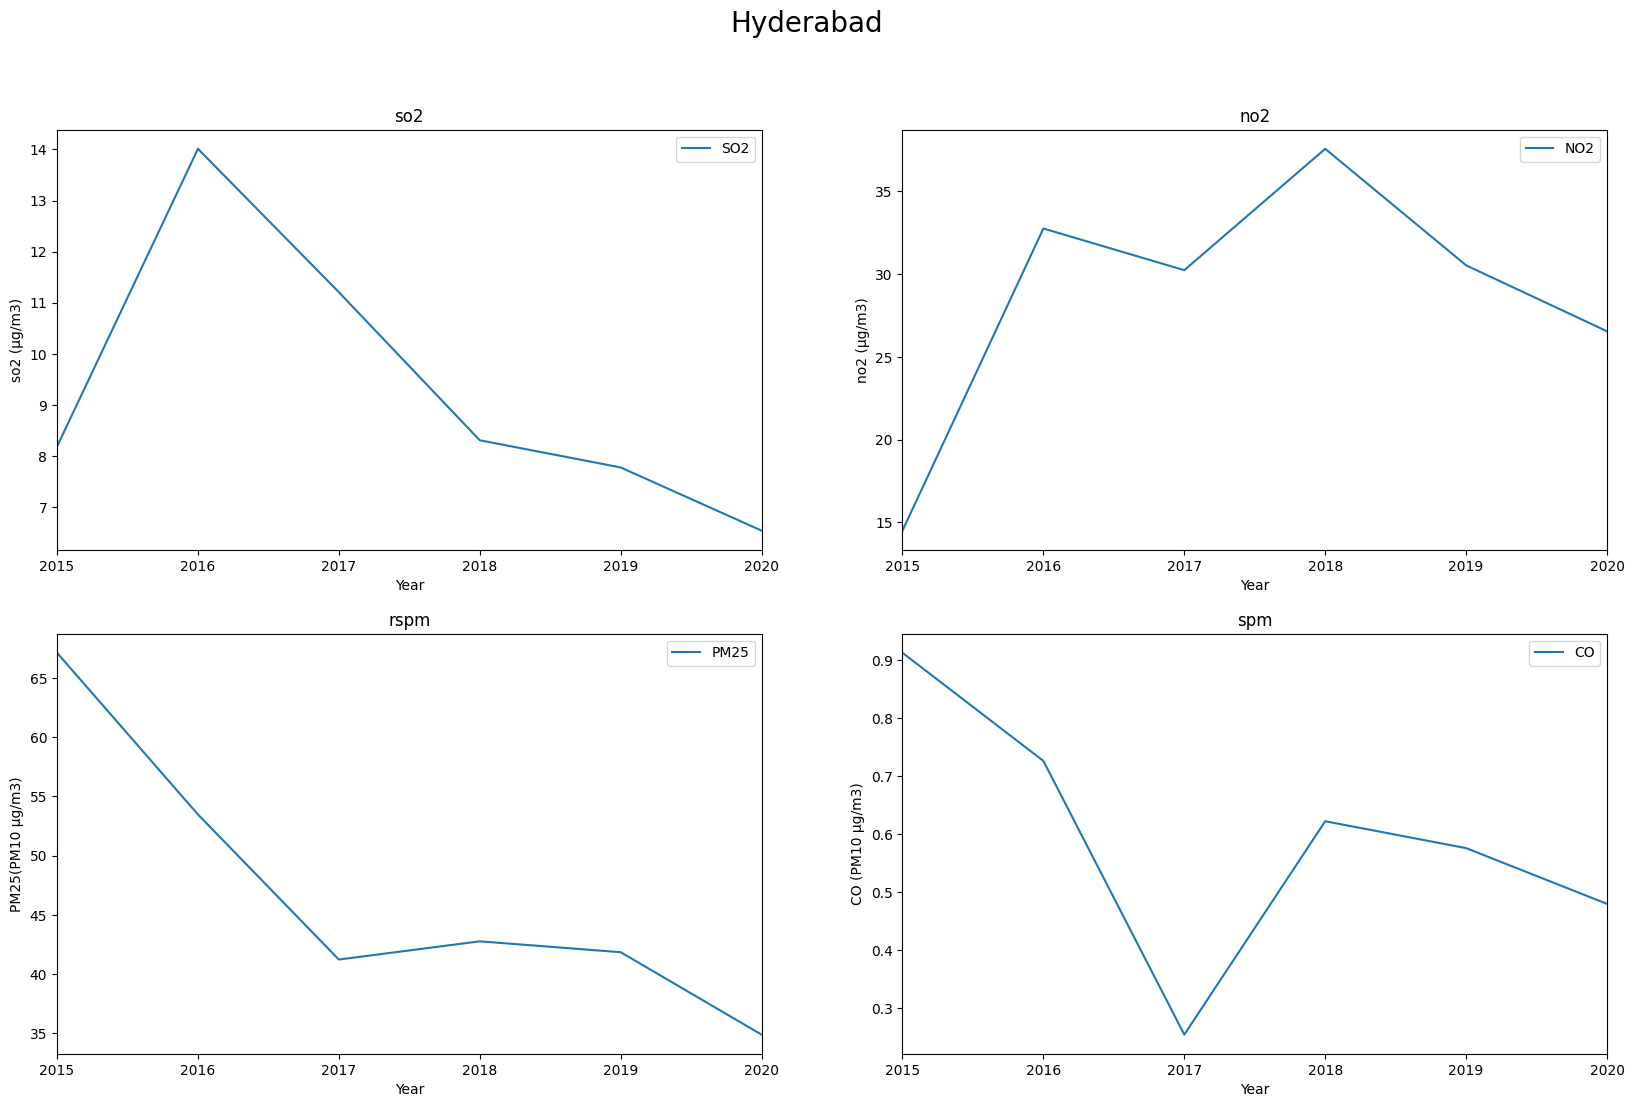

In [51]:
plot_for_state("Hyderabad")

# Task - 6: Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

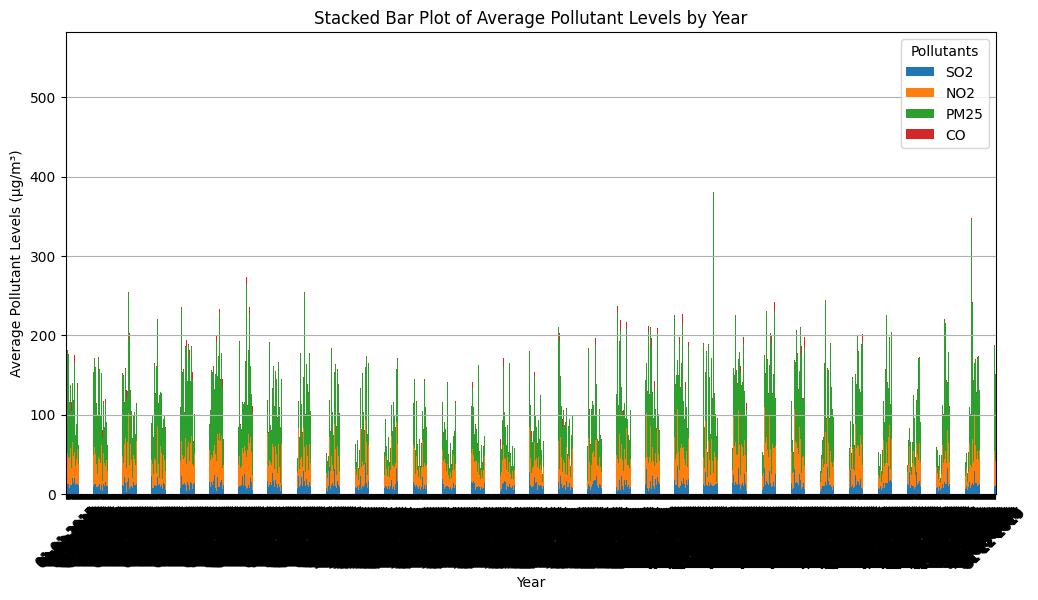

In [55]:
# If you want a stacked bar plot comparing multiple pollutants:
# First, create a DataFrame for multiple pollutants
pollutants = df.groupby('Date')[['SO2', 'NO2', 'PM25','CO']].mean().reset_index()

# Plotting stacked bar plot
pollutants.set_index('Date').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Average Pollutant Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Pollutant Levels (μg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.grid(axis='y')
plt.show()


# Task - 7: Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories. 

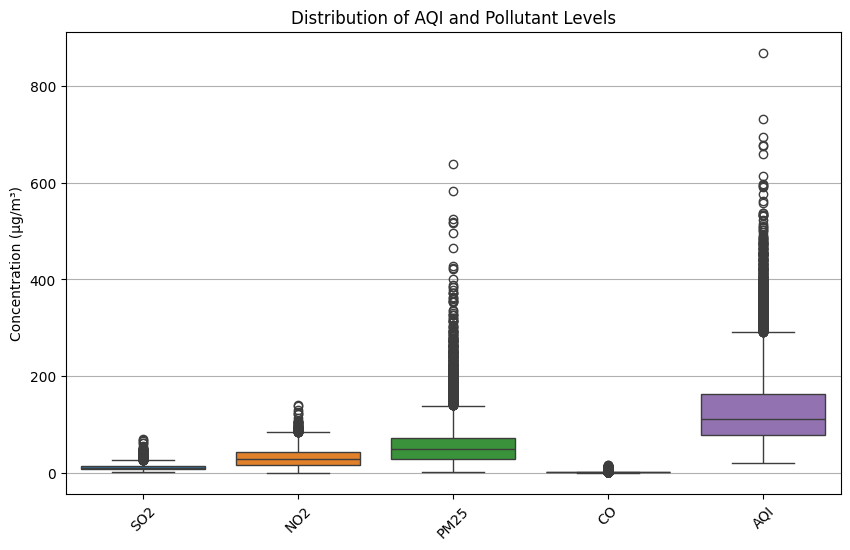

In [56]:
pollutants = ['SO2', 'NO2', 'PM25', 'CO']

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[pollutants + ['AQI']])
plt.title('Distribution of AQI and Pollutant Levels')
plt.ylabel('Concentration (μg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Task- 8: Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

In [57]:
# Function to plot pollutant averages by type for a given indicator
def type_avg(indicator):

    
    # Calculate averages based on the given indicator grouped by 'type'
    avg_data = df.groupby('type')[indicator].mean().reset_index()

    
    
    # Prepare sizes for bubbles (e.g., using average values as sizes)
    sizes = avg_data[indicator] * 10           # Adjust multiplier as needed


    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_data['type'], avg_data[indicator], s=sizes, alpha=0.5)
    plt.title("Pollutant average by type for {}".format(indicator))
    plt.xlabel("Type")
    plt.ylabel(indicator)
    plt.grid()
    plt.show()



# Call the function with the desired indicator
type_avg('so2')


KeyError: 'type'

# Task - 9: Customize the visualizations by adding labels, titles, legends, and appropriate color schemes

In [58]:
# Plotting pollutant averages by locations/state
# defining a function to plot pollutant averages for a given indicator (defaults to SO2)
def location_avgs(state, indicator="so2"):

    
    locs = df[VALUE_COLS + ['state', 'location', 'date']].groupby(['state','location']).mean()

    
    state_avgs = locs.loc[state].reset_index()

    
    sns.barplot(x='location', y=indicator, data=state_avgs)

    
    plt.title("Location-wise average for {} in {}".format(indicator, state))

    
    plt.xticks(rotation = 90)



location_avgs("Uttar Pradesh", "no2")

KeyError: "['state', 'location', 'date'] not in index"

In [59]:
# Defining a function to plot pollutant averages for a given indicator (defaults to SO2)def location_avgs(state, indicator="so2"):
# Calculate average pollutant levels by state and location
def location_avgs(state, indicator):

    locs = df[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()



    # Get averages for the specified state
    state_avgs = locs.loc[state].reset_index()



    # Create a bar plot with color
    sns.barplot(x='location', y=indicator, data=state_avgs, palette='Spectral')  # Added color palette



    plt.title("Location-wise Average for {} in {}".format(indicator, state))



    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.ylabel(f'Average {indicator} (μg/m³)')  # Custom y-axis label
    plt.xlabel('Location')  # Custom x-axis label
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()




# Call the function with the desired state and indicator
location_avgs("Uttar Pradesh", "no2")


KeyError: "['state', 'location', 'date'] not in index"